In [1]:
import pandas as pd
import numpy as np
from numpy import cov

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
# multivariate linear regression with regularization
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# support vector machine regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# neural network
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
# normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
# score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
# import keras
import tensorflow.keras
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
# import regularizer
from tensorflow.keras.regularizers import l1, l2
# import matplotlib
import matplotlib.pyplot as plt
# os
# randomseed

from numpy.random import seed
from numpy import asarray
from numpy import savetxt
###############################3
import os
import pickle
from calendar import monthrange


In [2]:
tensorflow.random.set_seed(0)

In [3]:
area_df     = pd.read_excel('area_2003-2019.xls', sheet_name = 'Sheet1')
lychee_yield_df = pd.read_excel('lycheeproduct.xlsx')
humidChiangrai=pd.read_excel('humidchiangrai.xlsx',sheet_name = 'Sheet2')
tempchiangrai=pd.read_excel('temperaturechiangrai.xlsx',sheet_name = 'Sheet2')
rainchiangrai=pd.read_excel('rainchiangrai.xlsx')
tempchiangrai=tempchiangrai.iloc[:,0:12]
humidChiangrai=humidChiangrai.iloc[:,0:12]
print(tempchiangrai)

JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC
0   19.9  21.0  24.2  27.0  26.6  27.4  26.8  27.0  26.4  24.9  21.4  20.5
1   20.2  21.7  24.8  27.2  26.6  27.2  26.3  26.3  26.8  25.9  22.1  19.1
2   19.5  22.8  24.7  27.1  27.5  27.0  27.2  27.0  27.1  26.4  23.0  20.5
3   21.9  22.3  24.5  28.5  29.0  28.6  27.4  26.7  26.7  25.9  22.6  21.8
4   20.8  22.0  23.6  25.7  26.7  27.4  27.2  26.3  26.7  25.6  22.4  20.3
5   20.6  22.8  24.6  27.5  27.4  27.6  26.5  26.9  26.5  26.1  25.2  22.1
6   21.1  24.1  24.2  28.5  28.2  27.6  26.8  26.7  26.3  24.5  24.0  18.5
7   19.3  22.0  24.6  27.3  27.9  28.0  26.9  26.5  26.8  25.8  24.1  20.9
8   19.6  21.7  25.1  26.4  28.5  28.7  27.7  27.2  27.2  25.6  24.6  21.7
9   19.0  21.6  26.1  29.5  28.9  27.5  26.8  27.1  27.1  26.5  24.6  21.7
10  21.5  22.8  25.9  26.7  27.6  27.8  26.8  27.1  27.0  26.1  24.2  20.7
11  21.0  22.6  24.7  25.9  27.0  27.1  27.3  26.8  27.3  26.1  23.1  22.5


In [ ]:
# ส่วนดึงข้อมูล มาเก็บไว้ที่ตัวแปรต่าง ################

In [4]:
rainchiangrai=pd.read_excel('cm_met_ChiangRai.xlsx',sheet_name='Rainfall')
pressurechiangrai=pd.read_excel('cm_met_ChiangRai.xlsx',sheet_name='Pressure')
pheno=pd.read_excel('cm_met_Chiangrai.xlsx',sheet_name='pheno')

rainchiangrai=rainchiangrai.iloc[0,1:]
rainchiangrai=rainchiangrai.to_numpy()
rainchiangrai=rainchiangrai.reshape(12,13)
rainchiangrai=np.delete(rainchiangrai,12,1)
###############################################3
pressurechiangrai=pressurechiangrai.iloc[0,1:]
pressurechiangrai=pressurechiangrai.to_numpy()
pressurechiangrai=pressurechiangrai.reshape(12,13)
pressurechiangrai=np.delete(pressurechiangrai,12,1)
#########################################################
pheno=pheno.iloc[3,2:]
pheno=pheno.to_numpy()
pheno=pheno.reshape(12,12)
########################################################

inputchiangrai=pd.read_excel('input.xlsx')
Y_chiangrai=inputchiangrai.iloc[3:,3]
inputchiangrai=inputchiangrai.iloc[3:,:4]
inputchiangrai=inputchiangrai.to_numpy()
#######################################################################
Y_chiangrai=Y_chiangrai.to_numpy()
tempchiangrai=tempchiangrai.to_numpy()

humidChiangrai=humidChiangrai.to_numpy()

print(humidChiangrai.shape)

(12, 12)


In [5]:
####################DATAINPUT##########################################33
X_chiangrai=inputchiangrai[:,0:3]
X_chiangrai=np.concatenate((tempchiangrai[:,0:2],X_chiangrai),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,pheno[:,0:2]),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,rainchiangrai[:,2:4]),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,humidChiangrai[:,0:2]),axis=1)
X_chiangrai=np.concatenate((X_chiangrai,pressurechiangrai[:,0:2]),axis=1)

In [6]:
######################################chiangmai####################################################################

In [7]:
inputchiagmai=pd.read_excel('inputchiangmai.xlsx')
tempchiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Temperature')
phenochiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Phenomena')
humidchiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Humidity')
rainchiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Rainfall')
pressurechiangmai=pd.read_excel('cm_met_Chiangmai.xlsx',sheet_name='Pressure')
Y_chiangmai=inputchiagmai.iloc[1:,3]



In [8]:
tempchiangmai=tempchiangmai.iloc[4,1:]
tempchiangmai=tempchiangmai.to_numpy()
tempchiangmai=tempchiangmai.reshape(13,13)
tempchiangmai=np.delete(tempchiangmai,9,0)
inputchiagmai=inputchiagmai.iloc[1:,:3]
#######################################################
phenochiangmai=phenochiangmai.iloc[3,1:]
phenochiangmai=phenochiangmai.to_numpy()
phenochiangmai=phenochiangmai.reshape(13,13)
phenochiangmai=np.delete(phenochiangmai,9,0)
########################################################


In [9]:
rainchiangmai=rainchiangmai.iloc[0,1:]
rainchiangmai=rainchiangmai.to_numpy()
rainchiangmai=rainchiangmai.reshape(13,13)
rainchiangmai=np.delete(rainchiangmai,12,1)
rainchiangmai=np.delete(rainchiangmai,9,0)
humidchiangmai=humidchiangmai.iloc[0,1:]
humidchiangmai=humidchiangmai.to_numpy()
humidchiangmai=humidchiangmai.reshape(13,13)
humidchiangmai=np.delete(humidchiangmai,12,1)

In [10]:

humidchiangmai=np.delete(humidchiangmai,9,0)
inputchiagmai=inputchiagmai.to_numpy()
Y_chiangmai=Y_chiangmai.to_numpy()
pressurechiangmai=pressurechiangmai.iloc[0,1:]
pressurechiangmai=pressurechiangmai.to_numpy()
pressurechiangmai=pressurechiangmai.reshape(13,13)
pressurechiangmai=np.delete(pressurechiangmai,12,1)
pressurechiangmai=np.delete(pressurechiangmai,9,0)
#X_chiangmai=tempchiangmai[:,0:2]
X_chiangmai=inputchiagmai[:,0:3]
X_chiangmai=np.concatenate((tempchiangmai[:,0:2],X_chiangmai,),axis=1)
X_chiangmai=np.concatenate((X_chiangmai,phenochiangmai[:,0:2]),axis=1)
X_chiangmai=np.concatenate((X_chiangmai,rainchiangmai   [:,2:4]),axis=1)
X_chiangmai=np.concatenate((X_chiangmai,humidchiangmai[:,0:2]),axis=1)
X_chiangmai=np.concatenate((X_chiangmai,pressurechiangmai[:,0:2]),axis=1)

In [ ]:
###############################Phayao#####################################

In [11]:
inputphayao=pd.read_excel('input3.xlsx')
tempphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Temperature')
phenophayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Phenomena')
humidphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Humidity')
rainphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Rainfall')
pressphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Pressure')
Y_phayao=inputphayao.iloc[1:,3]

In [12]:
rainphayao= rainphayao.drop(['Elements', 'Unnamed: 1', 'N-Years','Elements.1', 'Unnamed: 17', 'N-Years.1','Elements.2', 'Unnamed: 33', 'N-Years.2','Elements.3', 'Unnamed: 49', 'N-Years.3','Elements.4', 'Unnamed: 65', 'N-Years.4',], axis=1)
rainphayao= rainphayao.drop(['Elements.5', 'Unnamed: 81', 'N-Years.5','Elements.6', 'Unnamed: 97', 'N-Years.6','Elements.7', 'Unnamed: 113', 'N-Years.7','Elements.8', 'Unnamed: 129', 'N-Years.8','Elements.9', 'Unnamed: 145', 'N-Years.9',], axis=1)
rainphayao= rainphayao.drop(['Elements.10', 'Unnamed: 161', 'N-Years.10','Elements.11', 'Unnamed: 177', 'N-Years.11',], axis=1)


In [13]:
rainphayao=rainphayao.replace('-',0)

In [14]:
rainphayao=rainphayao.to_numpy()
tempphayao=tempphayao.to_numpy()
humidphayao=humidphayao.to_numpy()
pressphayao=pressphayao.to_numpy()
phenophayao=phenophayao.to_numpy()
Y_phayao=Y_phayao.to_numpy()

In [15]:
tempphayao=tempphayao[0,1:]
rainphayao=rainphayao[0,:]
humidphayao=humidphayao[0,1:]
pressphayao=pressphayao[0,1:]
phenophayao=phenophayao[3,1:]
rainphayao=rainphayao.reshape(12,13)
tempphayao=tempphayao.reshape(12,13)
humidphayao=humidphayao.reshape(12,13)
pressphayao=pressphayao.reshape(12,13)
phenophayao=phenophayao.reshape(12,13)
rainphayao=np.delete(rainphayao,12,1)
tempphayao=np.delete(tempphayao,12,1)
humidphayao=np.delete(humidphayao,12,1)
pressphayao=np.delete(pressphayao,12,1)
phenophayao=np.delete(phenophayao,12,1)
inputphayao=inputphayao.to_numpy()

In [16]:
X_phayao=inputphayao[1:,0:3]
X_phayao=np.concatenate((tempphayao[:,0:2],X_phayao,),axis=1)
X_phayao=np.concatenate((X_phayao,phenophayao[:,0:2]),axis=1)
X_phayao=np.concatenate((X_phayao,rainphayao[:,2:4]),axis=1)
X_phayao=np.concatenate((X_phayao,humidphayao[:,0:2]),axis=1)
X_phayao=np.concatenate((X_phayao,pressphayao[:,0:2]),axis=1)
X_phayao=np.delete(X_phayao,9,0)
Y_phayao=np.delete(Y_phayao,9,0)


In [17]:
X=X_chiangrai[:,[2,3,4,5,7,8,9,10,11,12]]
Tmp=X
Y=Y_chiangrai

In [18]:
print(X)

[[322.0 24.0 51211.0 1 28.9 213.8 69 63 1015.85 1012.96]
 [271.0 12.0 45982.0 0 40.4 178.9 76 73 1013.3 1012.37]
 [277.0 10.0 37228.0 0 31.9 52.1 72 68 1015.7 1010.2]
 [252.0 47.0 37228.0 1 23.9 89.8 72 63 1014.1 1011.7]
 [287.0 1.0 33938.0 1 91.9 84.8 75 67 1012.7 1010.5]
 [247.0 22.0 33586.0 1 37.5 104.7 75 68 1012.42 1009.22]
 [217.0 32.0 31916.0 1 59.1 2.2 76 75 1013.4 1011.6]
 [319.0 17.0 24290.0 0 6.4 131.7 77 66 1016.1 1010.7]
 [294.0 22.0 20476.0 0 22.4 191.8 75 69 1015.8 1012.9]
 [278.0 65.0 19426.0 0 0 4.8 73 68 1015.2 1015.2]
 [232.0 25.0 19316.0 0 12.2 160.9 80 68 1014.4 1013.1]
 [240.0 4.0 18624.0 0 35.6 136.6 78 70 1011.9 1012.5]]


In [19]:
print(X)

[[322.0 24.0 51211.0 1 28.9 213.8 69 63 1015.85 1012.96]
 [271.0 12.0 45982.0 0 40.4 178.9 76 73 1013.3 1012.37]
 [277.0 10.0 37228.0 0 31.9 52.1 72 68 1015.7 1010.2]
 [252.0 47.0 37228.0 1 23.9 89.8 72 63 1014.1 1011.7]
 [287.0 1.0 33938.0 1 91.9 84.8 75 67 1012.7 1010.5]
 [247.0 22.0 33586.0 1 37.5 104.7 75 68 1012.42 1009.22]
 [217.0 32.0 31916.0 1 59.1 2.2 76 75 1013.4 1011.6]
 [319.0 17.0 24290.0 0 6.4 131.7 77 66 1016.1 1010.7]
 [294.0 22.0 20476.0 0 22.4 191.8 75 69 1015.8 1012.9]
 [278.0 65.0 19426.0 0 0 4.8 73 68 1015.2 1015.2]
 [232.0 25.0 19316.0 0 12.2 160.9 80 68 1014.4 1013.1]
 [240.0 4.0 18624.0 0 35.6 136.6 78 70 1011.9 1012.5]]


In [20]:
Rootmean=tensorflow.keras.metrics.RootMeanSquaredError()

In [21]:
class Scaler3D():

    def __init__(self):
        self.scaler_list = {}

    def fit(self, x):
        self.x = x
        
        min_list = np.array([])
        max_list = np.array([])

        len_feature = x.shape[-1]

        for i in range(len_feature):
            self.scaler_list[i] = MinMaxScaler()
            self.scaler_list[i].fit(x[:, :, i])

    def transform(self, x):
        x_copy = x.copy()

        len_feature = x.shape[-1]

        for i in range(len_feature):
            x_copy[:,:,i] = self.scaler_list[i].transform(x[:, :, i])

        return x_copy

In [22]:
def rmse(y_true, y_pred):

    ind_ignorezero = (y_true != 0).reshape(-1,)
    error = (y_true - y_pred)
    se = error**2
    mse = np.mean(se)
    rmse = mse**0.5
    return rmse
def mape(y_true, y_pred):
    error = y_true - y_pred
    pe     = (y_true - y_pred)/y_true*100
    ape = np.abs(pe)
    mape = np.mean(ape)

    return mape  
def mae(y_true, y_pred):

    error = y_true - y_pred
    ae = np.abs(error)
    mae = np.mean(ae)

    return mae

In [23]:
n_size=X.shape[0]
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.3)
X_train_ord = X[:int(n_size*(1-0.3)), :]
X_test_ord  = X[int(n_size*(1-0.3)):, :]
Y_train_ord = Y[:int(n_size*(1-0.3))]
Y_test_ord  = Y[int(n_size*(1-0.3)):]

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_ord, np.log1p(Y_train_ord))
Y_all_test = lin_reg.predict(X)
Y_all_test[Y_all_test<0] = 0

Y_all_test = np.expm1(Y_all_test)

train_mae = mae(Y[:int(n_size*(1-0.3))], Y_all_test[:int(n_size*(1-0.3))])
test_mae = mae(Y[int(n_size*(1-0.3)):], Y_all_test[int(n_size*(1-0.3)):])

train_rmse = rmse(Y[:int(n_size*(1-0.3))], Y_all_test[:int(n_size*(1-0.3))])
test_rmse = rmse(Y[int(n_size*(1-0.3)):], Y_all_test[int(n_size*(1-0.3)):])

train_mape = mape(Y[:int(n_size*(1-0.3))], Y_all_test[:int(n_size*(1-0.3))])
test_mape = mape(Y[int(n_size*(1-0.3)):], Y_all_test[int(n_size*(1-0.3)):])

print('train MAE {:.2f}\ttest MAE {:.2f}'.format(train_mae, test_mae))
print('train RMSE {:.2f}\ttest RMSE {:.2f}'.format(train_rmse, test_rmse))
print('train MAPE {:.2f}\ttest MAPE {:.2f}'.format(train_mape, test_mape))
print('=========================')

train MAE 0.00	test MAE 1219.32
train RMSE 0.00	test RMSE 1303.17
train MAPE 0.00	test MAPE 22.05


In [25]:
print(X_train_ord)

[[322.0 24.0 51211.0 1 28.9 213.8 69 63 1015.85 1012.96]
 [271.0 12.0 45982.0 0 40.4 178.9 76 73 1013.3 1012.37]
 [277.0 10.0 37228.0 0 31.9 52.1 72 68 1015.7 1010.2]
 [252.0 47.0 37228.0 1 23.9 89.8 72 63 1014.1 1011.7]
 [287.0 1.0 33938.0 1 91.9 84.8 75 67 1012.7 1010.5]
 [247.0 22.0 33586.0 1 37.5 104.7 75 68 1012.42 1009.22]
 [217.0 32.0 31916.0 1 59.1 2.2 76 75 1013.4 1011.6]
 [319.0 17.0 24290.0 0 6.4 131.7 77 66 1016.1 1010.7]]


In [26]:
reg = l1(0.01)
neural = Sequential()
scaler=MinMaxScaler()
    # input layer
neural.add(Dense(20, activation='relu', input_dim=X.shape[1]))
    # hidden layer
neural.add(Dense(512, activation='relu',kernel_regularizer=reg)) 
#neural.add(Dropout(0.4))
neural.add(Dense(512, activation='relu',kernel_regularizer=reg))   
#neural.add(Dropout(0.4)) 
neural.add(Dense(512, activation='relu',kernel_regularizer=reg))   
#neural.add(Dropout(0.4))     
# output layer
neural.add(Dense(1, activation='relu'))
neural.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [27]:
scaler.fit(X_train_ord)
X_train=K.constant(X_train)
Y_train=K.constant(Y_train)
X_test=K.constant(X_test)
Y_test=K.constant(Y_test)
Y_train=K.constant(Y_train)
X_train_ord=K.constant(X_train_ord)
Y_train_ord=K.constant(Y_train_ord)
X_test_ord=K.constant(X_test_ord)
Y_test_ord=K.constant(Y_test_ord)
X=K.constant(X)

In [28]:
scaler.fit(X_train)
neural.fit(X_train_ord,Y_train_ord,epochs=100, verbose=1, batch_size=32)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 2s 290ms/sample - loss: 167983952.0000 - root_mean_squared_error: 12960.8545 - mae: 12127.8750 - mape: 100.0000
Epoch 2/100
8/8 [==============================] - 0s 3ms/sample - loss: 167983952.0000 - root_mean_squared_error: 12960.8545 - mae: 12127.8750 - mape: 100.0000
Epoch 3/100
8/8 [==============================] - 0s 2ms/sample - loss: 167983936.0000 - root_mean_squared_error: 12960.8545 - mae: 12127.8750 - mape: 100.0000
Epoch 4/100
8/8 [==============================] - 0s 2ms/sample - loss: 167983936.0000 - root_mean_squared_error: 12960.8545 - mae: 12127.8750 - mape: 100.0000
Epoch 5/100
8/8 [==============================] - 0s 3ms/sample - loss: 167983936.0000 - root_mean_squared_error: 12960.8545 - mae: 12127.8750 - mape: 100.0000
Epoch 6/100
8/8 [==============================] - 0s 3ms/sample - loss: 167983920.0000 - root_mean_squared_error: 12960.8545 - mae: 12127.8750 - mape: 100.0000
Epoch 7/100
8

In [29]:
y_pred=neural.predict(K.constant(X))
y_pred=y_pred.reshape(12,)


In [30]:
print(y_pred)

[17059.516  15304.016  12375.072  12370.163  11259.026  11145.247
 10587.454   8023.556   6733.538   6395.3696  6348.4854  6116.5513]


In [31]:
accuracy=neural.evaluate(X_train_ord, Y_train_ord)

8/1 [================================================================================================================================================================================================================================================] - 0s 27ms/sample - loss: 8844356.0000 - root_mean_squared_error: 2973.9412 - mae: 2538.4226 - mape: 21.8822


In [32]:
accuracy=neural.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 2ms/sample - loss: 1060720.5000 - root_mean_squared_error: 1029.8982 - mae: 951.2362 - mape: 18.0375


In [33]:
accuracy=neural.evaluate(K.constant(X),Y)


12/1 [========================================================================================================================================================================================================================================================================================================================================================================] - 0s 19ms/sample - loss: 6249810.5000 - root_mean_squared_error: 2499.9561 - mae: 2009.3604 - mape: 20.6006


In [34]:
reg = l1(0.02)
neural2 = Sequential()
scaler=MinMaxScaler()
    # input layer
neural2.add(Dense(256, activation='relu', input_dim=X.shape[1]))
    # hidden layer
#neural.add(Dropout(0.2))
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg)) 
#neural.add(Dropout(0.2))
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg))   
#neural.add(Dropout(0.2))
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg))
#neural.add(Dropout(0.2))   
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg))  
# output layer
neural2.add(Dense(1, activation='relu'))
neural2.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [35]:
neural2.fit(X_train_ord,Y_train_ord,epochs=100, verbose=1, batch_size=32)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 1s 186ms/sample - loss: 165340960.0000 - root_mean_squared_error: 12858.4688 - mae: 12024.2949 - mape: 99.0771
Epoch 2/100
8/8 [==============================] - 0s 1ms/sample - loss: 35291984.0000 - root_mean_squared_error: 5940.6465 - mae: 4810.9302 - mape: 35.2060
Epoch 3/100
8/8 [==============================] - 0s 2ms/sample - loss: 23970298.0000 - root_mean_squared_error: 4895.8765 - mae: 4502.0859 - mape: 45.5611
Epoch 4/100
8/8 [==============================] - 0s 2ms/sample - loss: 26997166.0000 - root_mean_squared_error: 5195.8145 - mae: 4774.5508 - mape: 48.2748
Epoch 5/100
8/8 [==============================] - 0s 3ms/sample - loss: 9068410.0000 - root_mean_squared_error: 3011.2690 - mae: 2631.0386 - mape: 23.7800
Epoch 6/100
8/8 [==============================] - 0s 3ms/sample - loss: 16979102.0000 - root_mean_squared_error: 4120.4912 - mae: 2816.3472 - mape: 18.2645
Epoch 7/100
8/8 [==================

In [36]:
y_pred=neural2.predict(X)
print(y_pred)

[[17059.715 ]
 [15223.419 ]
 [12160.778 ]
 [12148.499 ]
 [10984.223 ]
 [10872.96  ]
 [10276.532 ]
 [ 7624.357 ]
 [ 6302.5684]
 [ 5949.545 ]
 [ 5911.9985]
 [ 5677.876 ]]


In [37]:
accuracy=neural2.evaluate(X_train_ord, Y_train_ord)

8/1 [================================================================================================================================================================================================================================================] - 0s 22ms/sample - loss: 8593645.0000 - root_mean_squared_error: 2931.4426 - mae: 2438.3220 - mape: 20.3483


In [38]:
accuracy=neural2.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 2ms/sample - loss: 416930.2188 - root_mean_squared_error: 645.4777 - mae: 513.2469 - mape: 9.9455


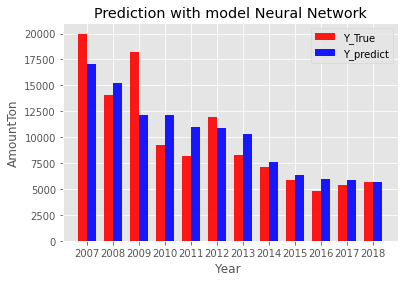

In [39]:
plt.style.use('ggplot')
n = X_chiangmai.shape[0]

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_pred.reshape(12,), bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Prediction with model Neural Network')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
    ))
ax.legend()
plt.show()

In [40]:
####################################################GRU#############################

In [41]:
X=Tmp

In [42]:
X=X.reshape(X.shape[0],1,X.shape[1])

In [43]:
n_size=X.shape[0]

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.3)
X_train_ord = X[:int(n_size*(1-0.3)), :,:]
X_test_ord  = X[int(n_size*(1-0.3)):, :,:]
Y_train_ord = Y[:int(n_size*(1-0.3))]
Y_test_ord  = Y[int(n_size*(1-0.3)):]

In [44]:

X_train=K.constant(X_train)
Y_train=K.constant(Y_train)
X_test=K.constant(X_test)
Y_test=K.constant(Y_test)
Y_train=K.constant(Y_train)
X_train_ord=K.constant(X_train_ord)
Y_train_ord=K.constant(Y_train_ord)
X_test_ord=K.constant(X_test_ord)
Y_test_ord=K.constant(Y_test_ord)
X=K.constant(X)

In [45]:
tensorflow.random.set_seed(0)

In [46]:
rnn = Sequential()
rnn.add(GRU(100, activation='relu', return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
#rnn.add(Dropout(0.4))
rnn.add(GRU(100, activation='relu', return_sequences=True))
rnn.add(Dropout(0.4))
#rnn.add(GRU(100, activation='relu'))    
    # rnn.add(BatchNormalization())    
#rnn.add(Dropout(0.4))
rnn.add(Dense(50, activation='relu'))
#rnn.add(Dropout(0.4))    
rnn.add(Dense(1, activation='relu'))
rnn.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [47]:
rnn.fit(X_train, Y_train_ord, epochs=100, batch_size=32, verbose=1)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 4s 508ms/sample - loss: 157058016.0000 - root_mean_squared_error: 12532.2793 - mae: 11578.7793 - mape: 94.2726
Epoch 2/100
8/8 [==============================] - 0s 2ms/sample - loss: 149623584.0000 - root_mean_squared_error: 12232.0723 - mae: 11276.5547 - mape: 91.6232
Epoch 3/100
8/8 [==============================] - 0s 3ms/sample - loss: 144020384.0000 - root_mean_squared_error: 12000.8496 - mae: 11014.9473 - mape: 88.9243
Epoch 4/100
8/8 [==============================] - 0s 3ms/sample - loss: 137417024.0000 - root_mean_squared_error: 11722.5010 - mae: 10820.1689 - mape: 87.9668
Epoch 5/100
8/8 [==============================] - 0s 2ms/sample - loss: 136331824.0000 - root_mean_squared_error: 11676.1221 - mae: 10577.8262 - mape: 84.1173
Epoch 6/100
8/8 [==============================] - 0s 3ms/sample - loss: 127729488.0000 - root_mean_squared_error: 11301.7471 - mae: 10270.3350 - mape: 82.2809
Epoch 7/100
8/8 [==

In [48]:
y_pred1=rnn.predict(X)
y_pred1=y_pred1.reshape(12,)
print(y_pred1)

[15427.069  13916.525  11382.452  11392.14   10445.703  10345.367
  9851.619   7690.105   6606.255   6279.3975  6262.3677  6056.543 ]


In [49]:
accuracy=rnn.evaluate(X_train,Y_train)

8/1 [================================================================================================================================================================================================================================================] - 0s 60ms/sample - loss: 9969541.0000 - root_mean_squared_error: 3157.4580 - mae: 2380.3950 - mape: 19.6247


In [50]:
accuracy=rnn.evaluate(X_test, Y_test)

4/1 [========================================================================================================================] - 0s 3ms/sample - loss: 1715972.6250 - root_mean_squared_error: 1309.9514 - mae: 1033.3887 - mape: 15.3200


In [51]:
########################LSTMแบบที่2######

In [52]:
rnn_LSTM2 = Sequential()
rnn_LSTM2.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(X.shape[1],X.shape[2])))
rnn_LSTM2.add(Dropout(0.2))
rnn_LSTM2.add(LSTM(512, activation='relu',return_sequences=True))
rnn_LSTM2.add(Dropout(0.2))
rnn_LSTM2.add(LSTM(512, activation='relu',return_sequences=True))
rnn_LSTM2.add(Dropout(0.2))
#rnn_LSTM2.add(LSTM(50, activation='relu',return_sequences=True))
rnn_LSTM2.add(Dropout(0.2))
rnn_LSTM2.add(Dense(512, activation='relu'))
#rnn_LSTM.add(Dropout(0.2))
rnn_LSTM2.add(Dense(1, activation='relu'))
rnn_LSTM2.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [53]:
rnn_LSTM2.fit(X_train_ord,Y_train_ord, epochs=100, batch_size=32, verbose=1)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 4s 557ms/sample - loss: 167700832.0000 - root_mean_squared_error: 12949.9355 - mae: 12117.4238 - mape: 99.9163
Epoch 2/100
8/8 [==============================] - 0s 4ms/sample - loss: 166738016.0000 - root_mean_squared_error: 12912.7080 - mae: 12076.7148 - mape: 99.5155
Epoch 3/100
8/8 [==============================] - 0s 3ms/sample - loss: 165654720.0000 - root_mean_squared_error: 12870.6924 - mae: 12032.1875 - mape: 99.1095
Epoch 4/100
8/8 [==============================] - 0s 3ms/sample - loss: 162426592.0000 - root_mean_squared_error: 12744.6689 - mae: 11929.8926 - mape: 98.4065
Epoch 5/100
8/8 [==============================] - 0s 3ms/sample - loss: 160655408.0000 - root_mean_squared_error: 12674.9912 - mae: 11854.3760 - mape: 97.7315
Epoch 6/100
8/8 [==============================] - 0s 3ms/sample - loss: 155706944.0000 - root_mean_squared_error: 12478.2588 - mae: 11654.8262 - mape: 95.9114
Epoch 7/100
8/8 [==

In [54]:
accuracy=rnn_LSTM2.evaluate(X_train_ord, Y_train_ord)

8/1 [================================================================================================================================================================================================================================================] - 1s 85ms/sample - loss: 9226959.0000 - root_mean_squared_error: 3037.5911 - mae: 2470.3816 - mape: 20.2281


In [55]:
accuracy=rnn_LSTM2.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 4ms/sample - loss: 762108.6250 - root_mean_squared_error: 872.9883 - mae: 781.3749 - mape: 14.9020


In [56]:
y_pred=rnn_LSTM2.predict(X)

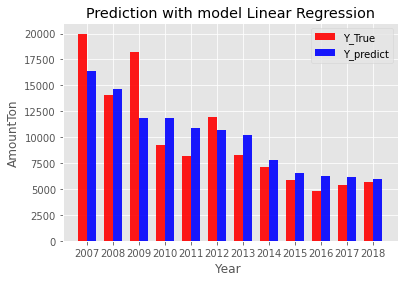

In [57]:
plt.style.use('ggplot')
n = X_chiangmai.shape[0]

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_pred.reshape(12,), bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Prediction with model Linear Regression')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
    ))
ax.legend()
plt.show()

In [58]:
GruChiangmai = Sequential()
GruChiangmai.add(GRU(10, activation='relu', return_sequences=True, input_shape=(X.shape[1],X.shape[2])))

GruChiangmai.add(GRU(50, activation='relu', return_sequences=True))

GruChiangmai.add(GRU(50, activation='relu',return_sequences=True))    
GruChiangmai.add(GRU(50, activation='relu',return_sequences=True))   
    # rnn.add(BatchNormalization())    
#GruChiangmai.add(Dropout(0.4))
GruChiangmai.add(Dense(50, activation='relu'))
#GruChiangmai.add(Dropout(0.4))    
GruChiangmai.add(Dense(1, activation='relu'))
GruChiangmai.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [59]:
GruChiangmai.fit(X_train_ord, Y_train_ord, epochs=100, batch_size=32, verbose=1)

Train on 8 samples
Epoch 1/100
8/8 [==============================] - 7s 916ms/sample - loss: 165842160.0000 - root_mean_squared_error: 12877.9717 - mae: 12045.5107 - mape: 99.2805
Epoch 2/100
8/8 [==============================] - 0s 4ms/sample - loss: 166670560.0000 - root_mean_squared_error: 12910.0957 - mae: 12077.0889 - mape: 99.5527
Epoch 3/100
8/8 [==============================] - 0s 4ms/sample - loss: 166416416.0000 - root_mean_squared_error: 12900.2490 - mae: 12067.2305 - mape: 99.4658
Epoch 4/100
8/8 [==============================] - 0s 4ms/sample - loss: 166137744.0000 - root_mean_squared_error: 12889.4434 - mae: 12056.4131 - mape: 99.3705
Epoch 5/100
8/8 [==============================] - 0s 3ms/sample - loss: 165862336.0000 - root_mean_squared_error: 12878.7549 - mae: 12045.7129 - mape: 99.2762
Epoch 6/100
8/8 [==============================] - 0s 3ms/sample - loss: 165596064.0000 - root_mean_squared_error: 12868.4131 - mae: 12035.3555 - mape: 99.1849
Epoch 7/100
8/8 [==

In [60]:
accuracy=GruChiangmai.evaluate(X_train_ord, Y_train_ord)

8/1 [================================================================================================================================================================================================================================================] - 1s 131ms/sample - loss: 8941436.0000 - root_mean_squared_error: 2990.2234 - mae: 2440.5266 - mape: 20.0001


In [61]:
accuracy=GruChiangmai.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 3ms/sample - loss: 493817.9688 - root_mean_squared_error: 702.7218 - mae: 590.9653 - mape: 11.3619


In [62]:
y_GRU=GruChiangmai.predict(X)


In [63]:
print(y_GRU)

[[[16613.8   ]]

 [[14861.139 ]]

 [[11941.84  ]]

 [[11928.783 ]]

 [[10861.167 ]]

 [[10727.033 ]]

 [[10146.501 ]]

 [[ 7666.297 ]]

 [[ 6394.6606]]

 [[ 6006.973 ]]

 [[ 5987.7964]]

 [[ 5763.431 ]]]


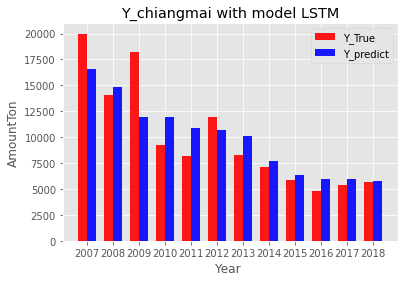

In [64]:
plt.style.use('ggplot')
n = X_chiangmai.shape[0]

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_GRU.reshape(12,), bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Y_chiangmai with model LSTM')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
    ))
ax.legend()
plt.show()

In [65]:
##############################RNN#########################################################

In [66]:
########################################FeatureSelection##########################